In [1]:
#test avec prophet

In [3]:
import pandas as pd
import numpy as np
from fbprophet import Prophet

In [169]:
uber = pd.read_csv('../uber_data.csv', parse_dates = ['pickup_dt'])

In [170]:
man = uber[uber['borough'] == 'Manhattan']

In [171]:
man = man[man['pickup_dt'] < '2015-03-01 00:00:00']

In [172]:
man = man[['pickup_dt', 'pickups']]

In [173]:
man.columns = ['ds', 'y']

In [174]:
man.tail()

,ds,y
9357,2015-02-28 19:00:00,4929
9364,2015-02-28 20:00:00,5234
9371,2015-02-28 21:00:00,4614
9378,2015-02-28 22:00:00,4760
9385,2015-02-28 23:00:00,5359


In [220]:
model = Prophet()
model.fit(man)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [221]:
future = model.make_future_dataframe(periods = 5)
future.tail()

,ds
1415,2015-03-01 23:00:00
1416,2015-03-02 23:00:00
1417,2015-03-03 23:00:00
1418,2015-03-04 23:00:00
1419,2015-03-05 23:00:00


In [222]:
forecast = model.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1415,2015-03-01 23:00:00,2830.020949,1800.959380,3855.634673
1416,2015-03-02 23:00:00,2870.808215,1893.340665,3898.006726
1417,2015-03-03 23:00:00,3076.011813,2021.024774,4089.817738
1418,2015-03-04 23:00:00,3346.277274,2325.108711,4436.631577
1419,2015-03-05 23:00:00,3541.036858,2505.618680,4548.600282


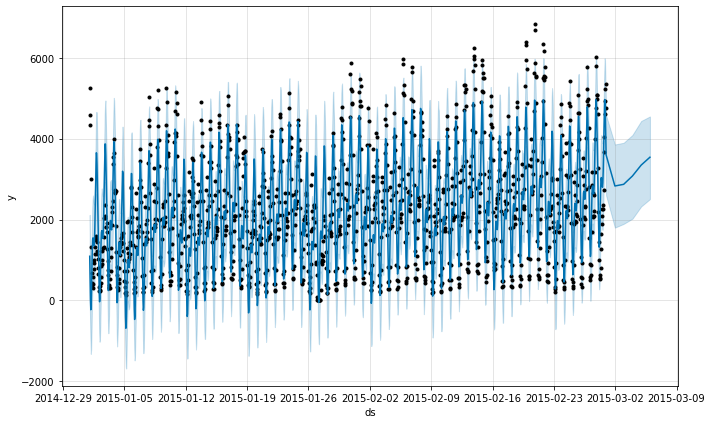

In [223]:
fig = model.plot(forecast)

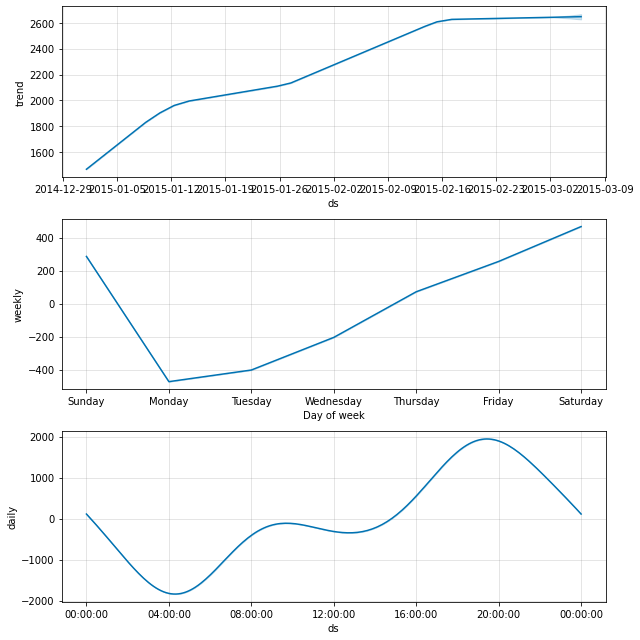

In [224]:
fig = model.plot_components(forecast)